In [7]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller


import pandas as pd

def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    table = pd.read_html(url, header=0)[0]
    tickers = table.Symbol.to_list()
    return tickers[:100]  # Get the first 100 tickers

sp500_tickers = get_sp500_tickers()


def get_djia_tickers():
    try:
        url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
        djia_table = pd.read_html(url, header=0)[1]  # Adjust table index if needed
        tickers = djia_table['Symbol'].tolist()
        return tickers
    except Exception as e:
        print(f"Error fetching DJIA tickers: {e}")
        return []

djia_tickers = get_djia_tickers()


def get_cac40_tickers():
    try:
        url = 'https://en.wikipedia.org/wiki/CAC_40'
        cac40_tables = pd.read_html(url, header=0)
        # The table we're interested in might not always be at the same index
        for table in cac40_tables:
            if 'Ticker' in table.columns:
                tickers = table['Ticker'].tolist()
                return tickers
        return []  # Return an empty list if the table isn't found
    except Exception as e:
        print(f"Error fetching CAC 40 tickers: {e}")
        return []

cac40_tickers = cac40_tickers = [
    "AI.PA", "AIR.PA", "ALO.PA", "MT.AS", "ORA.PA", "CS.PA", "BNP.PA", 
    "EN.PA", "CAP.PA", "CA.PA", "ACA.PA", "BN.PA", "DSY.PA", "EL.PA", 
    "RMS.PA", "KER.PA", "LR.PA", "OR.PA", "MC.PA", "ML.PA", "SGO.PA", 
    "SAN.PA", "SU.PA", "GLE.PA", "SW.PA", "HO.PA","VIE.PA", "DG.PA", "VIV.PA", "WLN.PA", "RI.PA", "TEP.PA", 
    "TTE.PA", "ATO.PA", "AI.PA", "ENGI.PA"]




tickers = cac40_tickers





# Define the date range for historical data
start_date = "2015-01-01"
end_date = "2023-01-01"

# Function to test a pair of stocks
def test_pair(ticker1, ticker2):
    try:
        # Download historical stock data
        data = yf.download([ticker1, ticker2], start=start_date, end=end_date)["Adj Close"]

        # Drop rows with any missing values and check if data is sufficient
        data.dropna(inplace=True)
        if len(data) < 30:  # Arbitrary threshold for minimum data length
            return None

        # Calculate the ratio of the two stock prices
        data["Price Ratio"] = data[ticker1] / data[ticker2]

        # Conduct the Augmented Dickey-Fuller test on the price ratio
        adf_result = adfuller(data['Price Ratio'])

        # Return the p-value and the pair of tickers
        return (adf_result[1], ticker1, ticker2)
    except Exception as e:
        print(f"Error processing pair {ticker1}, {ticker2}: {e}")
        return None

results = []
# Iterate over pairs and apply the test
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        result = test_pair(tickers[i],tickers[j])
        if result and result[0] < 0.05:  # Checking for stationarity and valid result
            results.append(result)

# Sort results by p-value
results.sort(key=lambda x: x[0])

# Print the top 5 pairs
print("Top 5 suitable pairs:")
for result in results[:5]:
    print(f"{result[1]} and {result[2]}, p-value: {result[0]}")


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%********

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%********

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%********

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%********

In [20]:

import numpy as np

# User inputs for stock tickers
stock1 = 'NFLX'
stock2 = 'CMCSA'

# Download historical stock data
start_date = "2009-01-01"
end_date = "2023-01-01"
data = yf.download([stock1, stock2], start=start_date, end=end_date)["Adj Close"]

# Check if data is successfully downloaded
if data.empty:
    raise ValueError("Data download failed or returned an empty DataFrame.")

data.ffill(inplace=True)  # Forward fill any missing values

# Calculate the ratio of the two stock prices
data["Price Ratio"] = data[stock1] / data[stock2]

# Calculate the historical mean and standard deviation of the price ratio
mean_ratio = data['Price Ratio'].mean()
std_ratio = data['Price Ratio'].std()

# Define thresholds for entering and exiting trades
entry_threshold = 0.2  # Enter trade if 2 standard deviations away from mean
exit_threshold = 1  # Exit trade if 0.7 standard deviations away from mean

# Define a function to determine trade signals
def determine_trade_signals(ratio, mean, std, entry_threshold, exit_threshold):
    signals = {'Buy Stock1': [], 'Sell Stock2': [], 'Exit': []}
    in_trade = False

    for r in ratio:
        if not in_trade and r > mean + entry_threshold * std:
            # Ratio is high: Buy Stock1, Sell Stock2
            signals['Buy Stock1'].append(True)
            signals['Sell Stock2'].append(False)
            signals['Exit'].append(False)
            in_trade = True
        elif not in_trade and r < mean - entry_threshold * std:
            # Ratio is low: Sell Stock1, Buy Stock2
            signals['Buy Stock1'].append(False)
            signals['Sell Stock2'].append(True)
            signals['Exit'].append(False)
            in_trade = True
        elif in_trade and (mean - exit_threshold * std < r < mean + exit_threshold * std):
            # Ratio has reverted towards mean: Exit trade
            signals['Buy Stock1'].append(False)
            signals['Sell Stock2'].append(False)
            signals['Exit'].append(True)
            in_trade = False
        else:
            # No trade signal
            signals['Buy Stock1'].append(False)
            signals['Sell Stock2'].append(False)
            signals['Exit'].append(False)

    return signals

# Apply the function to generate trade signals
trade_signals = determine_trade_signals(data['Price Ratio'], mean_ratio, std_ratio, entry_threshold, exit_threshold)

# Add trade signals to the data DataFrame
data['Buy Stock1'] = trade_signals['Buy Stock1']
data['Sell Stock2'] = trade_signals['Sell Stock2']
data['Exit Trade'] = trade_signals['Exit']

# Display the first few rows of the DataFrame
print(data.head())


[*********************100%***********************]  2 of 2 completed
               CMCSA      NFLX  Price Ratio  Buy Stock1  Sell Stock2  \
Date                                                                   
2009-01-02  6.668795  4.267143     0.639867       False         True   
2009-01-05  6.335114  4.562857     0.720249       False        False   
2009-01-06  6.409513  4.705714     0.734177       False        False   
2009-01-07  6.190035  4.672857     0.754900       False        False   
2009-01-08  6.290474  4.735714     0.752839       False        False   

            Exit Trade  
Date                    
2009-01-02       False  
2009-01-05       False  
2009-01-06       False  
2009-01-07       False  
2009-01-08       False  


Final Portfolio Value: nan


<IPython.core.display.Javascript object>


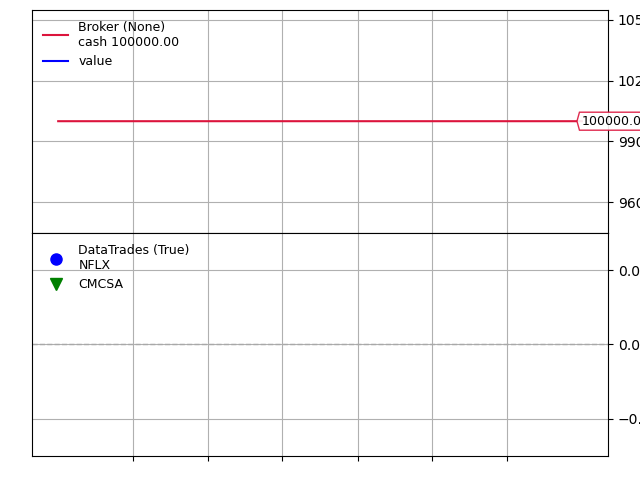

[[<Figure size 640x480 with 2 Axes>]]

In [15]:
import backtrader as bt
import backtrader.feeds as btfeeds

# Create a subclass of bt.Strategy to define the trading logic
class PairTradingStrategy(bt.Strategy):
    def __init__(self):
        # Keep track of whether we are in the market
        self.in_market = False

    def next(self):
        # Check if we should enter the trade
        if not self.in_market and self.data.buy_stock1[0] and self.data.sell_stock2[0]:
            self.buy(data=self.data0)  # Buy Stock1
            self.sell(data=self.data1)  # Sell Stock2
            self.in_market = True
        elif self.in_market and self.data.exit_trade[0]:
            self.close(data=self.data0)  # Exit Buy Stock1
            self.close(data=self.data1)  # Exit Sell Stock2
            self.in_market = False

# Load data into backtrader
class PandasData(btfeeds.PandasData):
    lines = ('buy_stock1', 'sell_stock2', 'exit_trade',)
    params = (('buy_stock1', -1), ('sell_stock2', -1), ('exit_trade', -1),)

data0 = PandasData(dataname=data, name='NFLX', plot=False)
data1 = PandasData(dataname=data, name='CMCSA', plot=False)

# Initialize Cerebro engine
cerebro = bt.Cerebro()
cerebro.addstrategy(PairTradingStrategy)
cerebro.adddata(data0)
cerebro.adddata(data1)

# Set initial cash and commission
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(commission=0.001)

# Run the strategy
results = cerebro.run()
final_value = cerebro.broker.getvalue()
print(f"Final Portfolio Value: {final_value}")

# Plot the results (optional)
cerebro.plot()


In [16]:
import backtrader as bt
import backtrader.feeds as btfeeds
import numpy as np

# Strategy class as defined previously
class PairTradingStrategy(bt.Strategy):
    params = (('entry_threshold', 2.0), ('exit_threshold', 0.5),)

    def __init__(self):
        self.in_market = False

    def next(self):
        if not self.in_market and self.data.ratio[0] > self.p.entry_threshold:
            self.buy(data=self.data0)  # Buy Stock1
            self.sell(data=self.data1)  # Sell Stock2
            self.in_market = True
        elif self.in_market and abs(self.data.ratio[0]) < self.p.exit_threshold:
            self.close(data=self.data0)  # Exit Buy Stock1
            self.close(data=self.data1)  # Exit Sell Stock2
            self.in_market = False

# Data class as defined previously
class PandasData(btfeeds.PandasData):
    lines = ('ratio',)
    params = (('ratio', -1),)

# Optimization function
def run_strategy(entry_threshold, exit_threshold):
    cerebro = bt.Cerebro()
    cerebro.addstrategy(PairTradingStrategy, entry_threshold=entry_threshold, exit_threshold=exit_threshold)
    cerebro.adddata(PandasData(dataname=data, name='AAPL', plot=False))
    cerebro.adddata(PandasData(dataname=data, name='MSFT', plot=False))
    cerebro.broker.setcash(100000)
    cerebro.broker.setcommission(commission=0.001)
    results = cerebro.run()
    final_value = cerebro.broker.getvalue()
    return final_value

# Parameter ranges for optimization
entry_thresholds = np.arange(1.5, 3.0, 0.5)
exit_thresholds = np.arange(0.25, 1.0, 0.25)

# Optimization loop
best_value = 0
best_params = (None, None)

for entry_threshold in entry_thresholds:
    for exit_threshold in exit_thresholds:
        value = run_strategy(entry_threshold, exit_threshold)
        if value > best_value:
            best_value = value
            best_params = (entry_threshold, exit_threshold)

print(f"Best Value: {best_value}")
print(f"Best Parameters: Entry Threshold = {best_params[0]}, Exit Threshold = {best_params[1]}")


Best Value: 100000.0
Best Parameters: Entry Threshold = 1.5, Exit Threshold = 0.25
